Análise de Dados

**Sobre o conjunto de dados**:
Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas.

**Introdução**:
Vamos tentar entender a influência dos antecedentes dos pais, preparação para testes etc. no desempenho dos alunos.

[Download dos Dados](https://www.kaggle.com/spscientist/students-performance-in-exams)

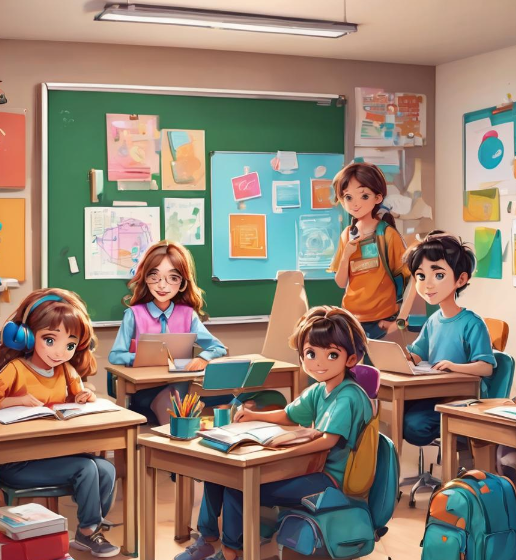

In [ ]:
# Importando as libs:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lendo a base de dados:
Base_dados = pd.read_csv('StudentsPerformance.csv')

# Dimensão da base de dados:
Base_dados.shape

(1000, 8)

In [ ]:
Base_dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


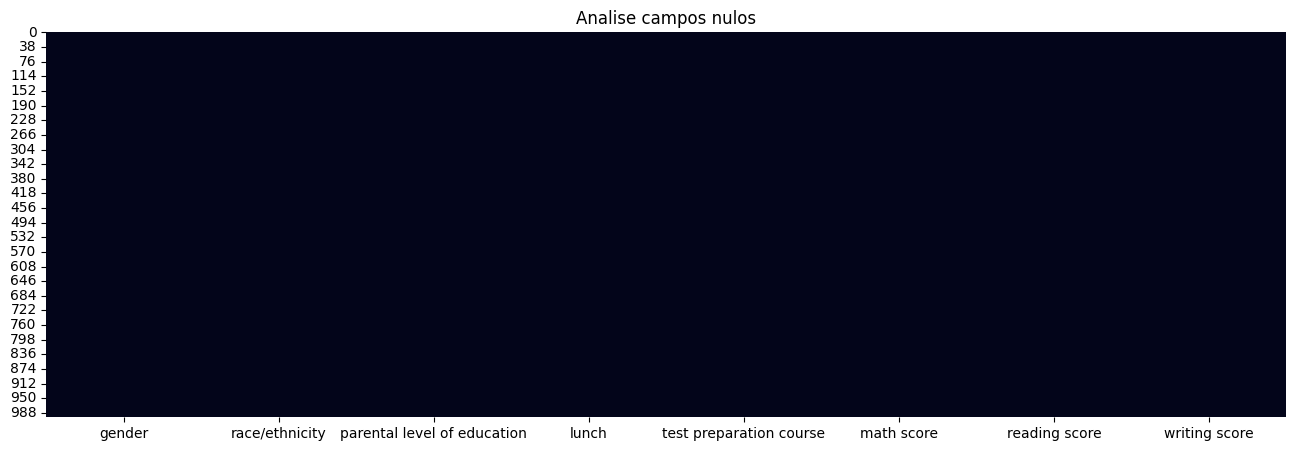

In [ ]:
# Verificar campos nulos:
Nulos = Base_dados.isnull()

plt.figure(figsize=(16, 5))
plt.title('Analise campos nulos')
sns.heatmap(Nulos, cbar=False);

In [ ]:
# Verificar os campos unicos:
Base_dados.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [ ]:
# Verificar campos duplicados:
Base_dados.duplicated().sum()

0

In [ ]:
# Estatísticas dos dados:
Base_dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
Base_dados.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Renomeando as colunas:

Base_dados.rename(columns={
   'gender': 'Sexo',
   'race/ethnicity' : 'Raça/Etinia',
   'parental level of education' : 'Grau de Escolaridade Pais',
   'lunch' : 'Refeição',
   'test preparation course':'Curso de Preparação',
   'math score' : 'Nota Matemática',
   'reading score': 'Nota Oral',
   'writing score' : 'Nota Redação',
}  , inplace=True)

In [ ]:
Base_dados.head()

,Sexo,Raça/Etinia,Grau de Escolaridade Pais,Refeição,Curso de Preparação,Nota Matemática,Nota Oral,Nota Redação
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
Base_dados['Sexo'].value_counts(normalize=True)*100

,proportion
Sexo,
female,51.8
male,48.2


In [ ]:
Base_dados['Raça/Etinia'].value_counts(normalize=True)*100

,proportion
Raça/Etinia,
group C,31.9
group D,26.2
group B,19.0
group E,14.0
group A,8.9


In [ ]:
Base_dados['Grau de Escolaridade Pais'].value_counts(normalize=True)*100

,proportion
Grau de Escolaridade Pais,
some college,22.6
associate's degree,22.2
high school,19.6
some high school,17.9
bachelor's degree,11.8
master's degree,5.9


In [ ]:
Base_dados['Refeição'].value_counts(normalize=True)*100

,proportion
Refeição,
standard,64.5
free/reduced,35.5


In [ ]:
Base_dados['Curso de Preparação'].value_counts(normalize=True)*100

,proportion
Curso de Preparação,
none,64.2
completed,35.8


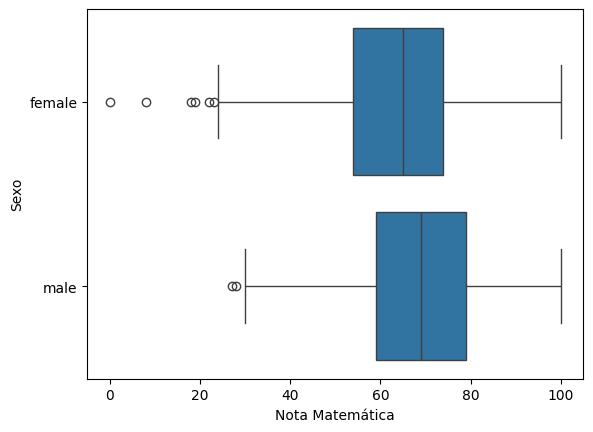

In [ ]:
# Comparando a variável 'Sexo' x 'Nota Matemática':
sns.boxplot(data=Base_dados, x='Nota Matemática', y='Sexo');

In [ ]:
Base_dados.groupby( by='Sexo').describe()['Nota Matemática'].reset_index()

,Sexo,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


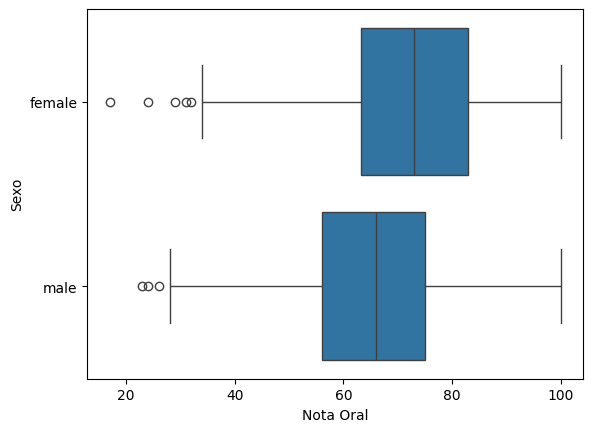

In [ ]:
# Comparando a variável 'Sexo' x 'Nota Oral':
sns.boxplot(data=Base_dados, x='Nota Oral', y='Sexo');

In [ ]:
Base_dados.groupby( by='Sexo').describe()['Nota Oral'].reset_index()

,Sexo,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
1,male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


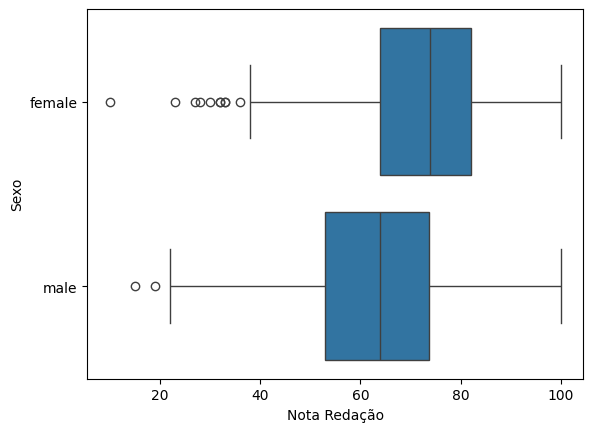

In [ ]:
# Comparando a variável 'Sexo' x 'Nota Redação':
sns.boxplot(data=Base_dados, x='Nota Redação', y='Sexo');

In [ ]:
Base_dados.groupby( by='Sexo').describe()['Nota Redação'].reset_index()

,Sexo,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
1,male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


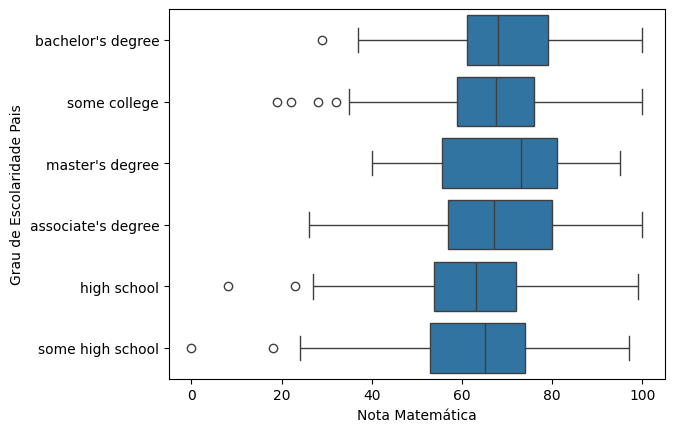

In [ ]:
# Comparando a variável 'Grau Escolaridade Pais' x 'Nota Matemática':
sns.boxplot(data=Base_dados, x='Nota Matemática', y='Grau de Escolaridade Pais');

In [ ]:
Base_dados.groupby(by = ['Grau de Escolaridade Pais']).describe()['Nota Matemática'].reset_index()

,Grau de Escolaridade Pais,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


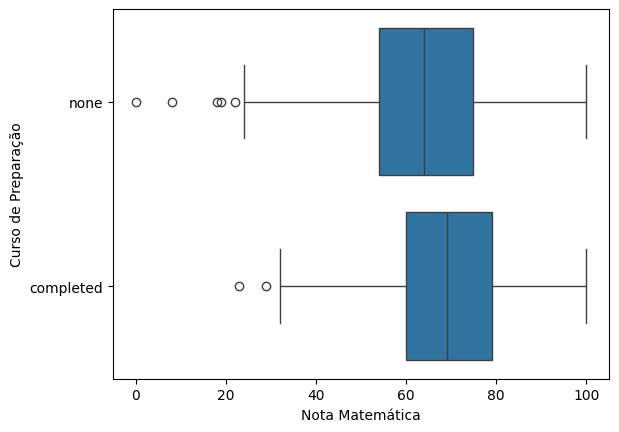

In [ ]:
# Comparando a variável 'Grau Escolaridade Pais' x 'Curso Preparação':
sns.boxplot(data=Base_dados, x='Nota Matemática', y='Curso de Preparação');

In [ ]:
Base_dados.groupby(by=['Curso de Preparação']).describe()['Nota Matemática'].reset_index()

,Curso de Preparação,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


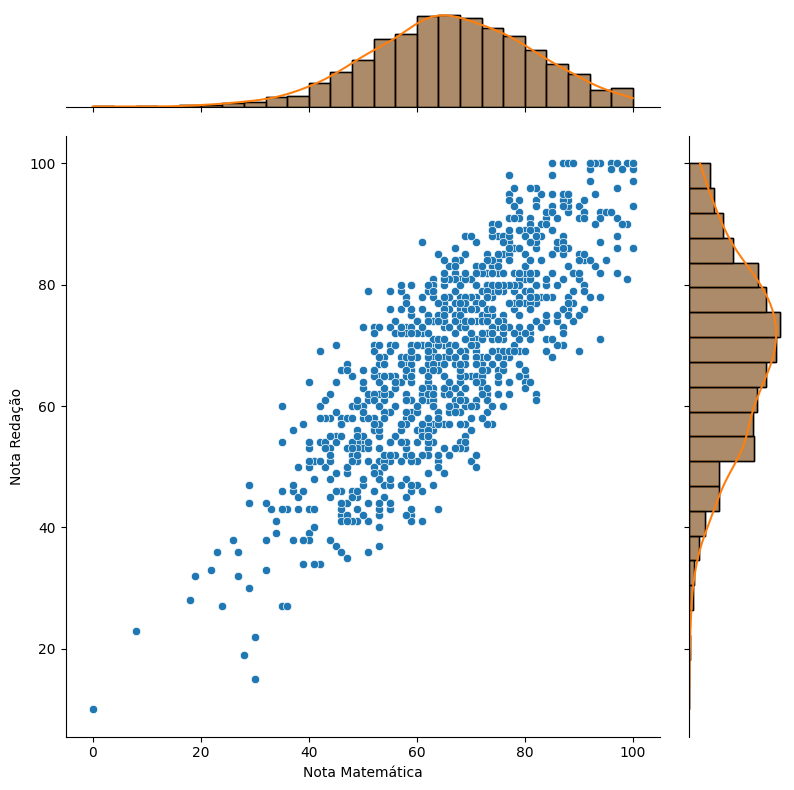

In [ ]:
g = sns.JointGrid(data=Base_dados, x="Nota Matemática", y="Nota Redação", space=0.3, height=8)

# Criando o gráfico de dispersão no centro
g.plot(sns.scatterplot, sns.histplot)

# Adicionando distribuições marginais
g.plot_marginals(sns.histplot, kde=True)

# Exibindo o gráfico
plt.show()

### Com base nas análises acima, conseguimos ver notas maiores de homens nas provas de matemaática se comparado com as mulheres, porém isso muda quando vamos para provas de redação e provas orais.

### Notamos uma média maior nas notas em geral de alunos que fizeram curso de preparação antes de realizar os testes e que o grau de escolaridade dos pais também influencia no desempenho dos alunos, quanto menor o nível da escolaridade, menor também o desempenho do aluno nas provas.